In [1]:
pip install tweepy

In [3]:
pip install -U textblob

     |████████████████████████████████| 636 kB 11.0 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [23]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
import tweepy
import datetime
import time
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
stop_words = stopwords.words('english')

In [5]:
#CONSUMER_KEY='wPocpBJ1SBIX72ChrmNVmwqW7'
#CONSUMER_SECRET='19YXTSdjPDTerzmucR6trlfjcWLyHUNDRHIgrpa47SljJSVC17'
#ACCESS_KEY='1213222796219707392-Llpv2CHK5chB7wMS8wZO3JkZ4ag2Tp'
#ACCESS_SECRET='r9TjvQfBtboe6KXvFuxpxX1MVwsujIMgfBreZWjgOJ8DC'

CONSUMER_KEY='HFHkPO52n5vTc1QV3lcoIlY5u'
CONSUMER_SECRET='erzvmAHv1ALrrmBSNzwdDr9BkUBnQ9WJfVTtlcwSnLGI12LrBw'
ACCESS_KEY='815789471966720000-0F5talxU1n78Yd8mgO9TfWzXawgp9Mw'
ACCESS_SECRET='cuEyGoG0JtBDZGf6XVrFVXDVpgZZn8XS6OuxE3aL0YwKc'
#Bearer_Token = 'AAAAAAAAAAAAAAAAAAAAAK5pUwEAAAAACNS8TM1F7HVMzgRMJidXuMnb69M%3DMJfx9dRznYa3v1BAiSYLGT38TcJhNHq8m7epWfrLKl8o0GGaPS'
auth=tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY,ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
import requests

url = "https://google-news.p.rapidapi.com/v1/topic_headlines"

querystring = {"lang":"en","country":"US","topic":"nation"}

headers = {
    'x-rapidapi-host': "google-news.p.rapidapi.com",
    'x-rapidapi-key': "da2c1768femshc74ec1e1c989e92p170d02jsnc7ddcd0e1879"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
data = response.json()

In [7]:
#instead of independent media source, we will use the media sources from the api. 

In [8]:
def get_topics(headlines):
  stop_words = stopwords.words('english')

  tokens=[token.strip() \
  for token in nltk.word_tokenize(headlines.lower()) \
      if token.strip() not in stop_words and \
        token.strip() not in string.punctuation]
  tokens=[token.strip() for token in tokens \
        if token.strip()!=' ']
  tokens=[token.strip() for token in tokens \
        if token.strip()!="'s"]

  lmtzr = nltk.WordNetLemmatizer()
  lemmatized_tokens = [lmtzr.lemmatize(token) for token in tokens]
  bigrams=list(nltk.bigrams(lemmatized_tokens))
  token_count=nltk.FreqDist(bigrams)
  phrases_dict = dict(token_count)
  sorted_phrases_dict = dict(sorted(phrases_dict.items(), key = lambda x: x[1], reverse = True))
  list_sorted_phrases = list(sorted_phrases_dict.items())
  topic =" ".join(list_sorted_phrases[0][0])
  return topic

In [9]:
topics = []
for x in range(len(data["articles"])):
  headlines = []
  for i in range(len(data["articles"][x]["sub_articles"])):
    headlines.append(data["articles"][x]["sub_articles"][i]['title'])
    tokenization_headlines = ",".join(headlines)
    topics.append(get_topics(tokenization_headlines))

In [10]:
topics = list(set(topics))

In [11]:
publishers = []
for x in range(len(data["articles"])):
  for i in range(len(data["articles"][x]["sub_articles"])):
    publishers.append(data["articles"][x]["sub_articles"][i]['publisher'])

In [12]:
publishers = list(set(publishers))

In [13]:
news_handles = ["@nypost", "@HoustonChron", "@BusinessInsider", "@Independent", "@usnews", "@guardian", "@YahooNews", "@DailySabah", "@ABC", "@axios", "@latimes", "@washingtonpost", "@cspanradio", "@AP", "@FoxBusiness", "@CNBC", "@MSNBC", "@sfchronicle", "@nbcbayarea", "@thehill", "@sacbee_news", "@FOXLA", "@BostonGlobe", "@Reuters", "@ReutersWorld", "@NYDailyNews", "@fox5dc", "@wbz", "@thedailybeast", "@FoxNews", "@politico", "@NPR", "@CBSSacramento", "@WSJ", "@ABC10", "@NBCNews", "@BBCWorld", "@BBCBreaking", "@BBCNews", "@CBSNews", "@voxdotcom", "@voxmedia", "@nytimes", "@seattletimes", "@Newsweek", "@BloombergTV", "@USATODAY"]

In [14]:
names_of_users = []
for handle in news_handles:
  names_of_users.append((api.get_user(handle)).name)

In [15]:
twitter_data_df = pd.DataFrame(names_of_users, columns=["News Outlets"])

In [16]:
twitter_data_df = twitter_data_df.set_index("News Outlets")

In [47]:
top_topics = topics[:30]

In [48]:
top_topics

['christmas photo',
 'national guard',
 'senate vote',
 'plumber awarded',
 'biden sign',
 'ghislaine maxwell',
 'university florida',
 'oregon earthquake',
 'omicron variant',
 'kim potter',
 '500 l.a.',
 'texas school',
 'state ag',
 'mexico policy',
 'winter olympics',
 'uk plan',
 'footage show',
 'oxford supt',
 'diesel fuel',
 'north carolina',
 'surgeon general',
 'navy seal',
 'devin nunes',
 'vaccine mandate',
 'portland police',
 'christmas parade',
 'youngkin say',
 'strip boebert',
 'aoc boebert',
 'covid-19 hospitalization']

In [49]:
twitter_data_df[top_topics] = None

In [50]:
twitter_data_df.shape

(47, 30)

In [21]:
pip install "requests[security]"

     |████████████████████████████████| 3.6 MB 14.7 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 


In [81]:
# initialize the first call
topic_polarities = {}

for topic in top_topics:
  topic_polarities[topic] = None

for topic in top_topics:
  mean_polarities = []
  for handle in news_handles:
    alltweets=[]
    tweet_strings = []
    new_tweets=api.user_timeline(screen_name= handle, 
                                  # 200 is the maximum allowed count
                                  count=200,
                                  #include_rts = False,
                                  tweet_mode = 'extended')
    alltweets.extend(new_tweets)
    oldest=alltweets[-1].id-1  #next time start from the oldest one minus one 
            
    # continue to get tweets
    while len(new_tweets)>0:  
        print ("getting tweets before", oldest)
        try:
          new_tweets = api.user_timeline(screen_name=handle,count=200, tweet_mode='extended', max_id=oldest)#include_rts=False
        except:
          time.sleep(5)
        alltweets.extend(new_tweets)
        oldest=alltweets[-1].id-1

    for i in range(len(alltweets)):
      temp_str = alltweets[i].full_text
      tweet_strings.append(temp_str)

    filtered_tweets = []

    for i in range(len(tweet_strings)):
      if topic in tweet_strings[i].lower():
        filtered_tweets.append(tweet_strings[i])

    if len(filtered_tweets) == 0:
      mean_polarities.append(0.00)
    else:
      polarity_list = []
      for tweet in filtered_tweets:
        analysis = TextBlob(tweet)
        polarity = analysis.sentiment.polarity
        polarity_list.append(polarity)
        
      mean_polarities.append((np.mean(polarity_list)))
  
  topic_polarities[topic] = mean_polarities

Streaming output truncated to the last 5000 lines.
getting tweets before 1457500451293827073
getting tweets before 1456358971372183558
getting tweets before 1455529173531959300
getting tweets before 1454236528327135233
getting tweets before 1453243517011169281
getting tweets before 1452160033345744895
getting tweets before 1451104604515622913
getting tweets before 1450871844593098753
getting tweets before 1468540824384425991
getting tweets before 1468001829107683327
getting tweets before 1466948343687438347
getting tweets before 1466443091703996415
getting tweets before 1466036864893087743
getting tweets before 1465535564682342399
getting tweets before 1464613025953075202
getting tweets before 1463720896691154951
getting tweets before 1463298065385861124
getting tweets before 1462893225287557122
getting tweets before 1461913428344426496
getting tweets before 1461486512021942277
getting tweets before 1461094712295710733
getting tweets before 1460690959226880002
getting tweets before 146

KeyboardInterrupt: ignored

In [ ]:
#Put the dictionary data into the dataframe
for topic, means_list in topic_polarities.items():
  twitter_data_df[topic] = means_list

In [52]:
twitter_data_df

,christmas photo,national guard,senate vote,plumber awarded,biden sign,ghislaine maxwell,university florida,oregon earthquake,omicron variant,kim potter,500 l.a.,texas school,state ag,mexico policy,winter olympics,uk plan,footage show,oxford supt,diesel fuel,north carolina,surgeon general,navy seal,devin nunes,vaccine mandate,portland police,christmas parade,youngkin say,strip boebert,aoc boebert,covid-19 hospitalization
News Outlets,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
New York Post,0.082352,0.688053,-0.724027,-0.289482,0.491452,0.742774,-0.303967,-0.618851,-0.679362,0.264981,0.508314,0.544632,0.525381,0.674504,0.600503,-0.696475,0.056437,0.298195,0.749558,0.296864,0.967527,0.847420,-0.795542,0.132892,-0.213247,-0.260679,-0.524875,-0.978256,0.009350,0.090495
Houston Chronicle,-0.101310,-0.254184,-0.935300,0.847788,-0.582200,0.912528,-0.395414,-0.532995,-0.950336,-0.616015,0.314787,0.102054,0.608896,-0.908929,-0.854425,0.689994,0.144711,-0.934168,0.963554,-0.925933,-0.660877,-0.054141,0.434970,0.008736,0.299366,-0.150102,-0.616087,0.057541,-0.177541,-0.633146
Business Insider,-0.575479,0.539728,-0.010909,0.423861,0.880704,0.145756,0.121302,0.002702,0.471040,-0.776162,0.939231,0.416597,-0.978260,0.881977,-0.881592,0.881398,0.337939,0.549819,0.106015,0.961602,0.942550,0.536464,-0.193847,-0.656931,-0.645287,-0.573074,-0.661157,-0.076930,-0.191781,0.133855
The Independent,0.683662,-0.828735,0.850132,-0.635051,0.781781,-0.017579,-0.764279,0.313981,-0.514809,-0.797283,-0.200556,0.369838,-0.897879,-0.562351,0.397979,-0.291486,0.253943,0.554484,-0.969203,-0.589654,0.268569,-0.572864,0.607920,-0.456139,0.536148,-0.042818,-0.018294,-0.025789,-0.767252,-0.870862
U.S. News & World Report,-0.368759,0.281745,0.069957,-0.145880,0.381174,0.783526,-0.579044,-0.466097,-0.863493,0.952060,0.777755,0.864921,-0.557460,0.604722,-0.729709,-0.006220,-0.672685,-0.323634,0.124398,-0.521104,0.420804,-0.536481,0.392804,-0.874848,0.099056,0.608713,0.675277,-0.837572,-0.514527,-0.162738
The Guardian,0.577083,-0.238722,-0.443738,-0.032659,0.527325,-0.717520,-0.402185,0.421969,-0.922699,-0.738200,-0.960981,0.639779,-0.157930,-0.570110,-0.672063,-0.155230,0.764188,-0.733499,-0.999188,-0.676504,-0.185794,0.582043,-0.313103,-0.542218,0.036862,-0.874479,0.107356,0.863168,-0.474303,0.046719
Yahoo News,0.898657,-0.034115,0.264391,-0.676833,-0.581382,-0.483094,-0.559141,-0.056093,0.861005,-0.030728,-0.244899,0.026075,-0.075484,-0.177785,-0.045535,-0.629486,-0.031557,0.788219,-0.184499,-0.650515,-0.082170,-0.362533,-0.314706,-0.094839,-0.705286,-0.232061,0.592886,0.755676,0.380573,-0.422178
DAILY SABAH,0.795599,-0.268226,0.849995,-0.059155,0.720150,-0.452282,0.654641,0.738814,0.110599,-0.544099,0.291137,0.504272,0.390110,0.359341,-0.655318,0.710722,-0.817573,0.217908,-0.255177,-0.399435,0.045022,0.639434,-0.751201,-0.389093,-0.591613,0.311955,-0.332400,0.739916,0.426245,0.178494
ABC News,0.214124,-0.810481,0.877813,-0.999528,-0.722504,-0.670642,-0.628270,0.565450,-0.054199,0.255940,0.322665,-0.657481,-0.296775,0.719125,-0.359011,0.669707,0.819553,0.291533,0.613864,0.054497,-0.444788,-0.460632,-0.610329,0.983729,0.722479,0.605901,0.260308,0.206534,-0.279854,0.271021


In [53]:
topic_sentiments = {}
for column in twitter_data_df.columns:
  public_tweets = api.search(column, count=100)
  polarity_list_tweets = []  
  for tweet in public_tweets:
    analysis = TextBlob(tweet.text)
    polarity_list_tweets.append(analysis.sentiment.polarity)

  topic_sentiments[column] = np.mean(polarity_list_tweets)

In [54]:
topic_sentiments

{'500 l.a.': 0.09174999999999998,
 'aoc boebert': -0.021151217532467535,
 'biden sign': -0.035649801587301584,
 'christmas parade': -0.06029345238095238,
 'christmas photo': 0.1671752344877345,
 'covid-19 hospitalization': 0.12505542929292926,
 'devin nunes': 0.22685039427463674,
 'diesel fuel': 0.08778588564213566,
 'footage show': -0.004340999278499289,
 'ghislaine maxwell': 0.052107744107744096,
 'kim potter': 0.023116792929292935,
 'mexico policy': 0.033060606060606054,
 'national guard': 0.0571439393939394,
 'navy seal': 0.059156024531024524,
 'north carolina': 0.09055445526695528,
 'omicron variant': 0.13252007575757577,
 'oregon earthquake': 0.14897222222222223,
 'oxford supt': 0.0686050156739812,
 'plumber awarded': 0.0,
 'portland police': -0.0031780303030303023,
 'senate vote': 0.053964285714285715,
 'state ag': 0.07821527777777777,
 'strip boebert': 0.24805208333333334,
 'surgeon general': 0.011290860990860997,
 'texas school': 0.058207034632034624,
 'uk plan': 0.03775952380

In [55]:
topic_avg_sentiments = {}
for column in twitter_data_df.columns:
  avg_sent = np.mean(twitter_data_df[column])
  topic_avg_sentiments[column] = avg_sent

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Sentiments of topics based on mainstream media')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

<BarContainer object of 12 artists>

<BarContainer object of 18 artists>

<Figure size 432x288 with 0 Axes>

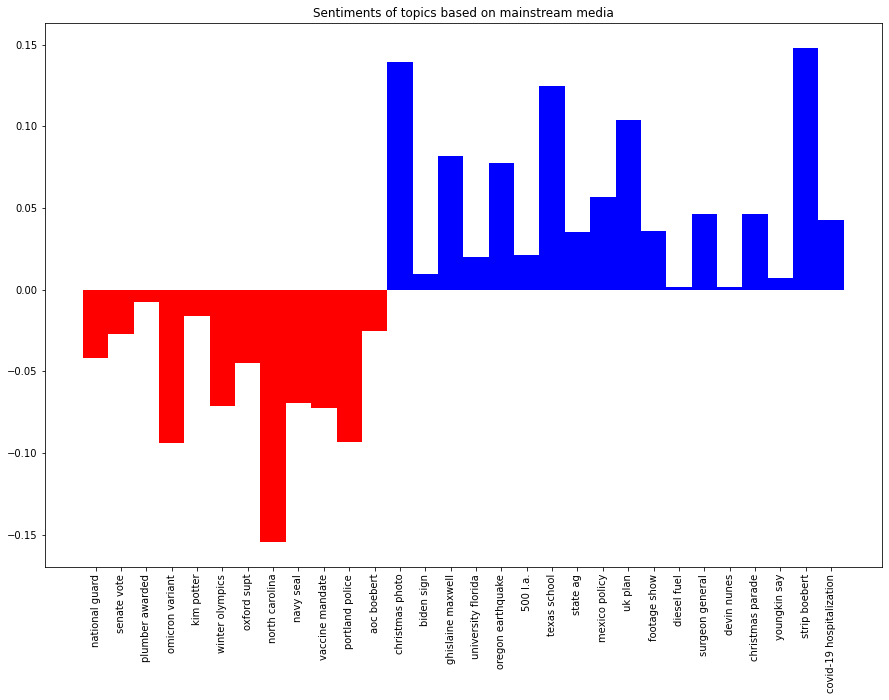

In [56]:
negative_data_avg_sents = {}
positive_data_avg_sents = {}
for key, val in topic_avg_sentiments.items():
  if val < 0:
    negative_data_avg_sents[key] = val
  elif val > 0:
    positive_data_avg_sents[key] = val

fig = plt.figure()
figure(figsize=(15, 10))
ax = plt.subplot(111)
ax.set_title("Sentiments of topics based on mainstream media")
plt.xticks(rotation=90)
ax.bar(negative_data_avg_sents.keys(), negative_data_avg_sents.values(), width=1, color='r')
ax.bar(positive_data_avg_sents.keys(), positive_data_avg_sents.values(), width=1, color='b')

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Sentiments of topics based on 100 most recent tweets')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

<BarContainer object of 6 artists>

<BarContainer object of 23 artists>

<Figure size 432x288 with 0 Axes>

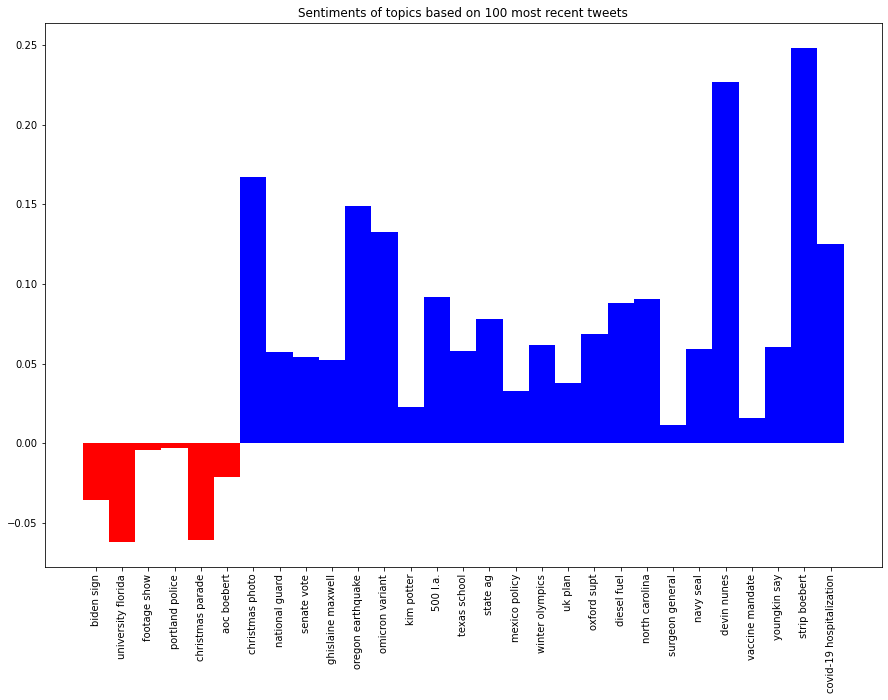

In [57]:
from matplotlib.pyplot import figure

negative_data = {}
positive_data = {}
for key, val in topic_sentiments.items():
  if val < 0:
    negative_data[key] = val
  elif val > 0:
    positive_data[key] = val

fig = plt.figure()
figure(figsize=(15, 10))
ax = plt.subplot(111)
ax.set_title("Sentiments of topics based on 100 most recent tweets")
plt.xticks(rotation=90)
ax.bar(negative_data.keys(), negative_data.values(), width=1, color='r')
ax.bar(positive_data.keys(), positive_data.values(), width=1, color='b')

<Figure size 1080x720 with 0 Axes>

<BarContainer object of 30 artists>

<BarContainer object of 30 artists>

([<matplotlib.axis.XTick at 0x7fc21b893890>,
 [Text(0, 0, 'christmas photo'),
  Text(0, 0, 'national guard'),
  Text(0, 0, 'senate vote'),
  Text(0, 0, 'plumber awarded'),
  Text(0, 0, 'biden sign'),
  Text(0, 0, 'ghislaine maxwell'),
  Text(0, 0, 'university florida'),
  Text(0, 0, 'oregon earthquake'),
  Text(0, 0, 'omicron variant'),
  Text(0, 0, 'kim potter'),
  Text(0, 0, '500 l.a.'),
  Text(0, 0, 'texas school'),
  Text(0, 0, 'state ag'),
  Text(0, 0, 'mexico policy'),
  Text(0, 0, 'winter olympics'),
  Text(0, 0, 'uk plan'),
  Text(0, 0, 'footage show'),
  Text(0, 0, 'oxford supt'),
  Text(0, 0, 'diesel fuel'),
  Text(0, 0, 'north carolina'),
  Text(0, 0, 'surgeon general'),
  Text(0, 0, 'navy seal'),
  Text(0, 0, 'devin nunes'),
  Text(0, 0, 'vaccine mandate'),
  Text(0, 0, 'portland police'),
  Text(0, 0, 'christmas parade'),
  Text(0, 0, 'youngkin say'),
  Text(0, 0, 'strip boebert'),
  Text(0, 0, 'aoc boebert'),
  Text(0, 0, 'covid-19 hospitalization')])

Text(0.5, 0, 'Topic')

Text(0, 0.5, 'Sentiment')

Text(0.5, 1.0, 'Avg sentiment of msm vs regular twitter users')

<Figure size 432x288 with 0 Axes>

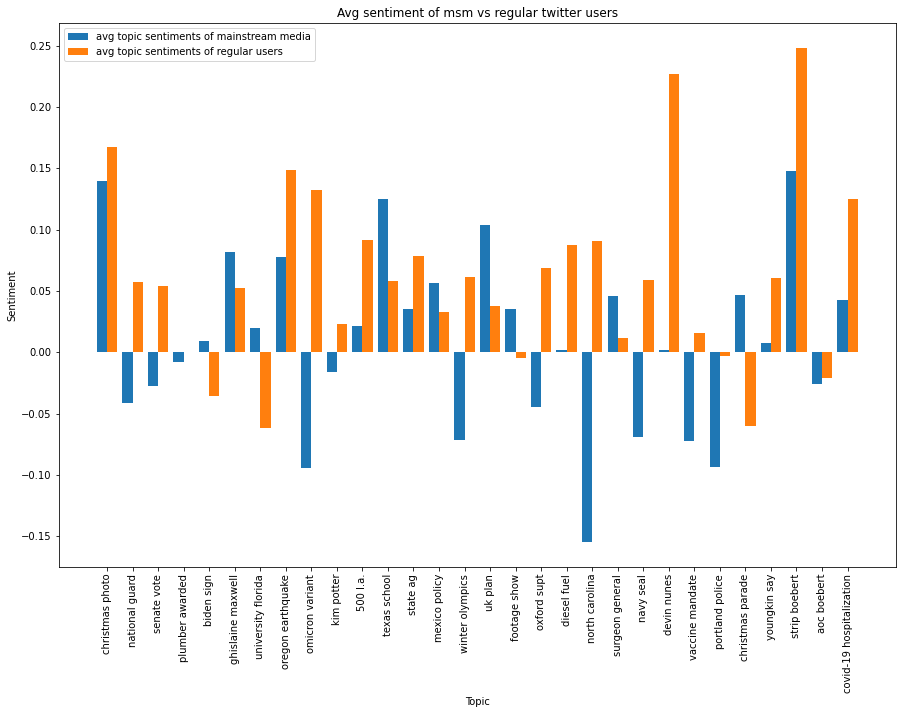

In [58]:
X_axis = np.arange(len(topic_avg_sentiments.keys()))

fig = plt.figure()
figure(figsize=(15, 10))
plt.bar(X_axis - 0.2, topic_avg_sentiments.values(), 0.4, label = 'avg topic sentiments of mainstream media')
plt.bar(X_axis + 0.2, topic_sentiments.values(), 0.4, label = 'avg topic sentiments of regular users')
  
plt.xticks(X_axis, topic_avg_sentiments.keys(), rotation = 90)
plt.xlabel("Topic")
plt.ylabel("Sentiment")
plt.title("Avg sentiment of msm vs regular twitter users")
plt.legend()
plt.show()

In [59]:
topics_and_msm = []
for column in twitter_data_df.columns:
  twitter_data_df["mstream vs regulars"] = twitter_data_df[column] - topic_sentiments[column]
  info = twitter_data_df.loc[twitter_data_df["mstream vs regulars"] == twitter_data_df["mstream vs regulars"].min(), column]
  topics_and_msm.append(info)
  twitter_data_df.drop("mstream vs regulars", axis=1, inplace=True) 

In [60]:
most_relatable_outlets = []

for i in list(range(len(topics_and_msm))):
  topic_name = topics_and_msm[i].name
  news_outlet = topics_and_msm[i].index[0]
  most_relatable_outlets.append(news_outlet)

  print(topic_name)
  print(news_outlet+"\n")

christmas photo
USA TODAY

national guard
The Associated Press

senate vote
The Daily Beast

plumber awarded
ABC News

biden sign
USA TODAY

ghislaine maxwell
FOX 5 DC

university florida
C-SPAN Radio

oregon earthquake
ABC10

omicron variant
FOX 11 Los Angeles

kim potter
POLITICO

500 l.a.
Newsweek

texas school
The Washington Post

state ag
C-SPAN Radio

mexico policy
Fox News

winter olympics
CBS Sacramento CBS13

uk plan
Vox

footage show
Axios

oxford supt
Houston Chronicle

diesel fuel
The Guardian

north carolina
ABC10

surgeon general
CNBC

navy seal
The Boston Globe

devin nunes
New York Post

vaccine mandate
Reuters World

portland police
FOX 11 Los Angeles

christmas parade
Reuters World

youngkin say
San Francisco Chronicle

strip boebert
New York Post

aoc boebert
New York Daily News

covid-19 hospitalization
USA TODAY



In [62]:
from collections import Counter

counted_outlets = dict(Counter(most_relatable_outlets))

sorted_counted_outlets = dict(sorted(counted_outlets.items(), key=lambda item: item[1]))

<Figure size 1080x720 with 0 Axes>

<BarContainer object of 23 artists>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text major ticklabel objects>)

Text(0.5, 0, 'Topic')

Text(0, 0.5, 'Count of outlets')

Text(0.5, 1.0, 'Most agreed with outlets')

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

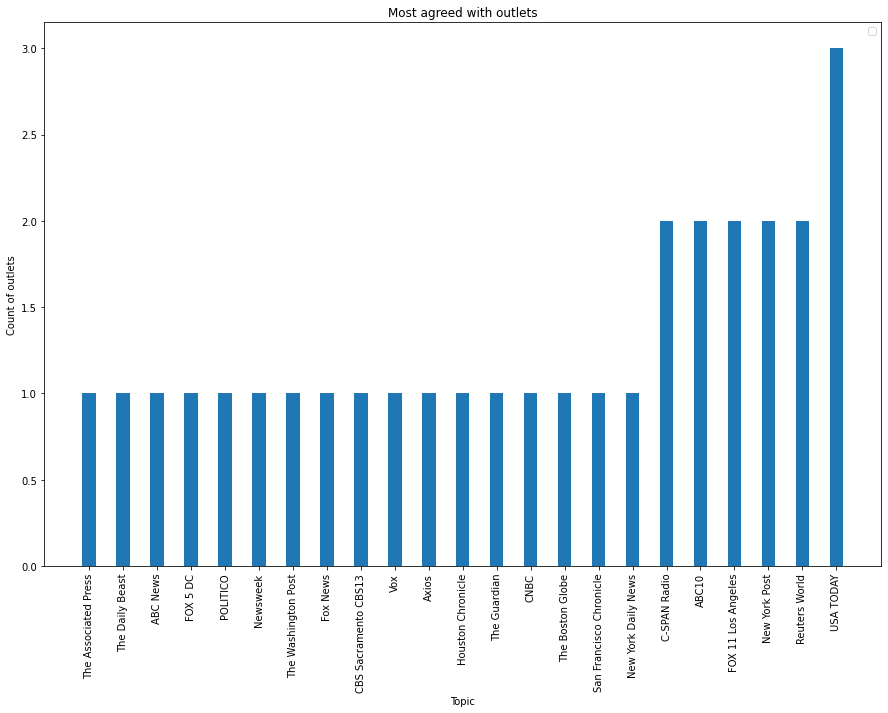

In [77]:
fig = plt.figure()
figure(figsize=(15, 10))
plt.bar(sorted_counted_outlets.keys(), sorted_counted_outlets.values(), 0.4)
  
plt.xticks(rotation = 90)
plt.xlabel("Topic")
plt.ylabel("Count of outlets")
plt.title("Most agreed with outlets")
plt.legend()
plt.show()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Most agreed with outlets')

([<matplotlib.patches.Wedge at 0x7fc219433f90>,
 [Text(1.0939740842771233, 0.11498131556922482, 'The Associated Press'),
  Text(1.0461621623552089, 0.3399187109534771, 'The Daily Beast'),
  Text(0.95262792914359, 0.5500000260141771, 'ABC News'),
  Text(0.8174592798855024, 0.7360436982469697, 'FOX 5 DC'),
  Text(0.646563733778614, 0.8899187255936678, 'POLITICO'),
  Text(0.4474102470118321, 1.0049000302860038, 'Newsweek'),
  Text(0.22870278350589437, 1.075962377045153, 'The Washington Post'),
  Text(-9.011575368071001e-08, 1.0999999999999963, 'Fox News'),
  Text(-0.22870295979891025, 1.0759623395729139, 'CBS Sacramento CBS13'),
  Text(-0.44741041166150514, 1.004899956979242, 'Vox'),
  Text(-0.6465638795889629, 0.889918619656241, 'Axios'),
  Text(-0.8174594004839141, 0.7360435643088525, 'Houston Chronicle'),
  Text(-0.952628019259335, 0.5499998699291084, 'The Guardian'),
  Text(-1.0461622180497965, 0.33991853954312395, 'CNBC'),
  Text(-1.093974103116432, 0.11498113632504342, 'The Boston G

<Figure size 432x288 with 0 Axes>

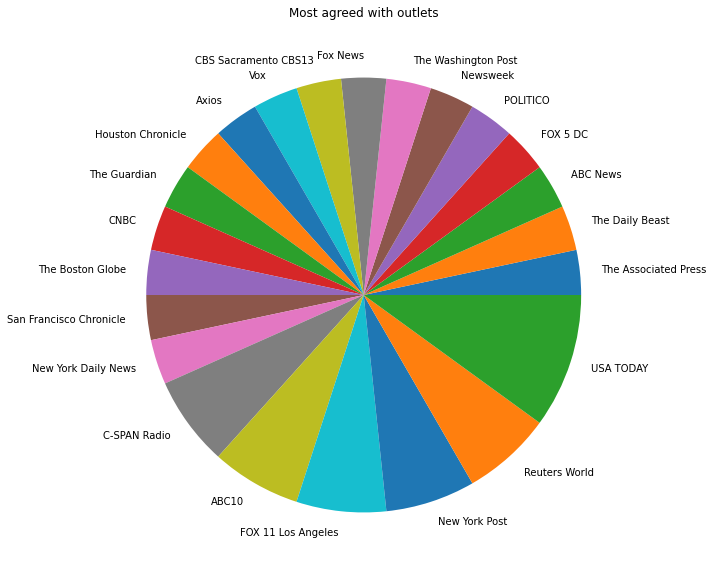

In [78]:
fig = plt.figure()
figure(figsize=(15, 10))

plt.title("Most agreed with outlets")
plt.pie(sorted_counted_outlets.values(), labels = sorted_counted_outlets.keys(), startangle = 90)
plt.show() 